<a href="https://colab.research.google.com/github/xyhosino/DeepLearning/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E7%AC%AC3%E8%AF%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df_ads = pd.read_csv('/content/drive/MyDrive/advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


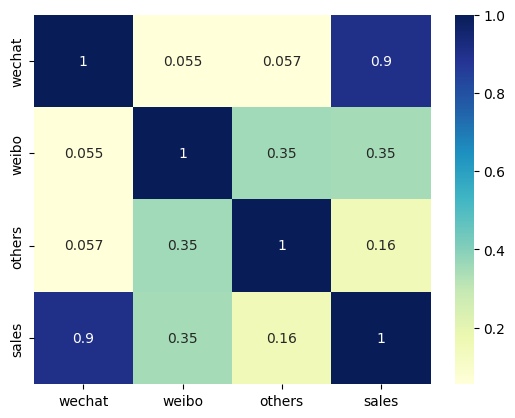

In [ ]:
#数据相关性分析
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_ads.corr(), cmap = "YlGnBu", annot = True)
plt.show()

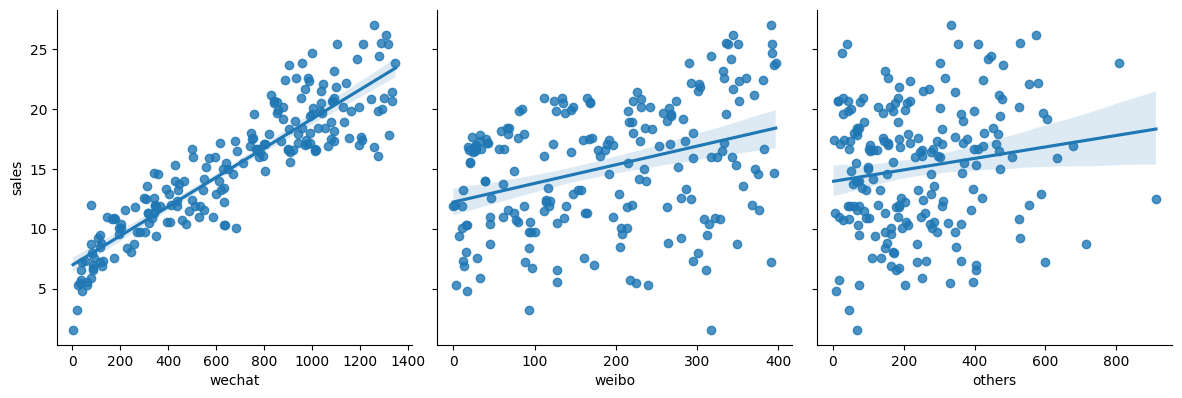

In [ ]:
#数据散点图
sns.pairplot(df_ads,
    x_vars = ['wechat', 'weibo', 'others'],
    y_vars = 'sales',
    height = 4, aspect = 1, kind = 'reg') #高度4，高宽比1:1，reg：散点图+线性回归线，scatter：散点图
plt.show()

In [ ]:
x = np.array(df_ads.wechat)
y = np.array(df_ads.sales)
#通过reshape向量转矩阵
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
#将数据集进行训练集80%、验证集20%分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

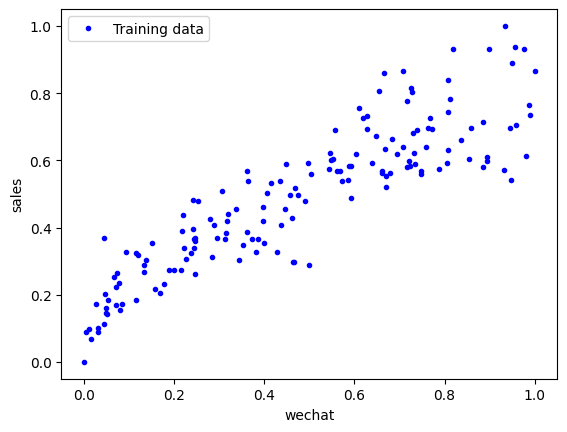

In [ ]:
#数据归一化
def scaler(train, test):
    # 计算训练集的统计量
    train_min = np.min(train)
    train_max = np.max(train)
    gap = train_max - train_min
    # 归一化训练集
    train = (train - train_min) / gap
    # 使用训练集统计量归一化测试集
    test = (test - train_min) / gap
    return train, test
x_train, x_test =scaler(x_train, x_test)
y_train, y_test =scaler(y_train, y_test)
plt.plot(x_train, y_train, 'b.', label = 'Training data')
plt.xlabel('wechat')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
#损失函数
def loss_function(x, y, weight, bias):
    y_hat = weight*x + bias
    loss = y_hat - y
    cost = np.sum(loss**2)/ (2*len(x))
    return cost
print('权重5，偏置3，损失为:', loss_function(x_train, y_train, weight=5, bias=3))
print('权重100，偏置1，损失为:', loss_function(x_train, y_train, weight=100, bias=1))

权重5，偏置3，损失为: 12.796390970780058
权重100，偏置1，损失为: 1577.9592615030556


In [ ]:
#梯度下降
def gradient_descent(x, y, w, b, lr, iter):
  l_history = np.zeros(iter)
  w_history = np.zeros(iter)
  b_history = np.zeros(iter)
  for i in range(iter):
    y_hat = w*x + b
    loss = y_hat - y
    derivative_w = x.T.dot(loss)/len(x)
    derivative_b = sum(loss)*1/len(x)
    w = w - lr*derivative_w
    b = b - lr*derivative_b
    l_history[i] = loss_function(x, y, w, b)
    w_history[i] = w.item() if hasattr(w, 'item') else float(w)
    b_history[i] = b.item() if hasattr(b, 'item') else float(b)
  return l_history, w_history, b_history

当前损失： 1.343795534906634


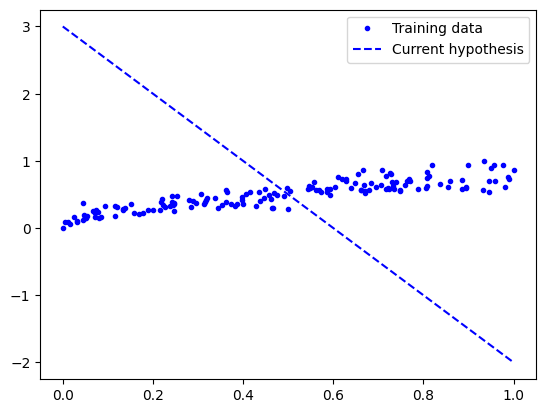

In [ ]:
iterations = 200
alpha = 0.5
weight = -5
bias = 3
print('当前损失：', loss_function(x_train, y_train, weight, bias))
plt.plot(x_train, y_train, 'b.', label = 'Training data')
line_x = np.linspace(x_train.min(), y_train.max(), 500)
line_y = [weight*xx + bias for xx in line_x]
plt.plot(line_x, line_y, 'b--', label = 'Current hypothesis')
plt.legend()
plt.show()

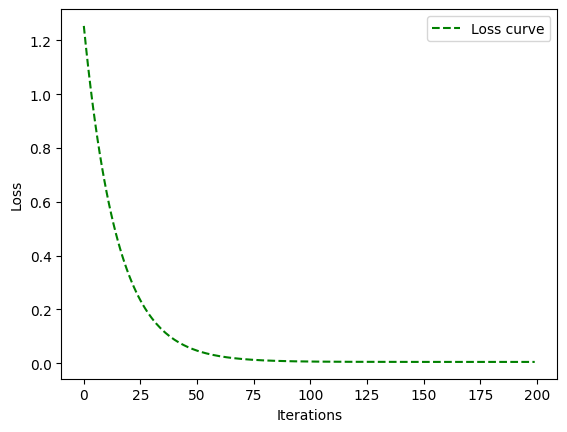

In [ ]:
#进行梯度下降
loss_history, weight_history, bias_history = gradient_descent(
    x_train, y_train, weight, bias, alpha, iterations
)
plt.plot(loss_history, 'g--', label = 'Loss curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print('当前损失：', loss_function(x_train, y_train, weight_history[-1], bias_history[-1]))

当前损失： 0.004658162172055582


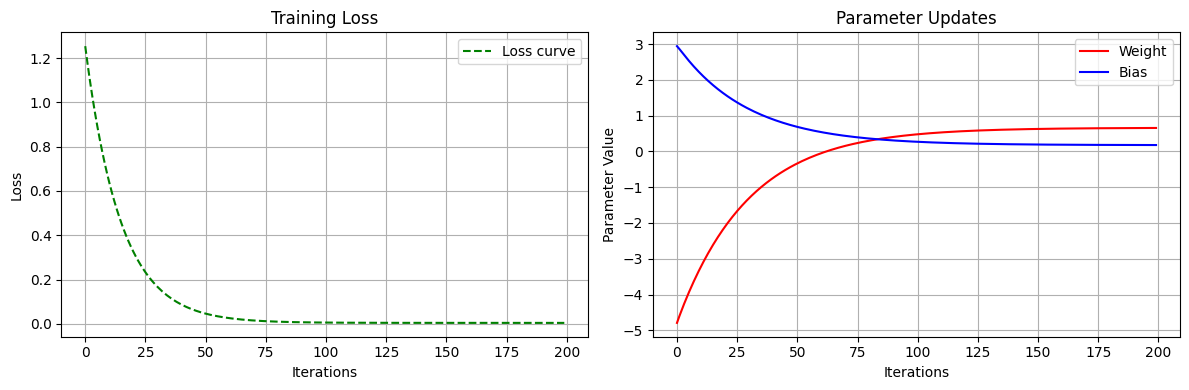

最终权重: 0.6545
最终偏置: 0.1773
最终损失: 0.0047
权重变化: -4.7932 → 0.6545
偏置变化: 2.9404 → 0.1773


In [ ]:
# 进行梯度下降
loss_history, weight_history, bias_history = gradient_descent(
    x_train, y_train, weight, bias, alpha, iterations
)

# 绘制损失曲线
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_history, 'g--', label='Loss curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(weight_history, 'r-', label='Weight')
plt.plot(bias_history, 'b-', label='Bias')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Parameter Updates')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"最终权重: {weight_history[-1]:.4f}")
print(f"最终偏置: {bias_history[-1]:.4f}")
print(f"最终损失: {loss_history[-1]:.4f}")
print(f"权重变化: {weight_history[0]:.4f} → {weight_history[-1]:.4f}")
print(f"偏置变化: {bias_history[0]:.4f} → {bias_history[-1]:.4f}")
